In [48]:
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


In [2]:
## Matplotlib defaults

plt.style.use("default")

plt.rcParams.update({"font.size" : 22})

# Negative Results

Negative results for why MA increases

Includes:
- Cost
- Degree
- Individual Researchers

## Cost

Individually plot cost figure

In [3]:
cost_df = pd.read_csv("/Volumes/Macintosh HD 4/SureChemBL/Cost/random_cost_50k_MA.csv")

print(cost_df)

       Unnamed: 0  Unnamed: 0.1           CAS     price  \
0               0        312645     2446-69-7   13.5664   
1               1        217713           NaN   75.9000   
2               2        144938     1759-55-3   58.8000   
3               3         81564  2095410-18-5  421.1000   
4               4        171801  1864299-18-2  169.3000   
...           ...           ...           ...       ...   
49995       49995         14022    21243-02-7  130.0000   
49996       49996         18129  1057326-92-7  151.7000   
49997       49997        214453   923034-27-9  403.5000   
49998       49998         11443    50617-74-8  151.7000   
49999       49999        308529  1214900-87-4  867.3600   

                                                    name    supplier  \
0                           4-Hexylphenol >= 98.0 % HPLC       sigma   
1                    3,6-dichloropyrazine-2-carbonitrile     enamine   
2                 2,2-dimethylcyclopropane-1-carboxamide     enamine   
3  

In [54]:
## Remove all "unfinished" MA calculations - unfinished are those that didn't finish in 300 seconds

cost_df_filtered = cost_df[cost_df["time"] <= 299]

## Also removing all -1 MA values
cost_df_filtered = cost_df_filtered[cost_df_filtered["MA"] > 0]

print(cost_df_filtered)

       Unnamed: 0  Unnamed: 0.1           CAS     price  \
0               0        312645     2446-69-7   13.5664   
1               1        217713           NaN   75.9000   
2               2        144938     1759-55-3   58.8000   
3               3         81564  2095410-18-5  421.1000   
4               4        171801  1864299-18-2  169.3000   
...           ...           ...           ...       ...   
49995       49995         14022    21243-02-7  130.0000   
49996       49996         18129  1057326-92-7  151.7000   
49997       49997        214453   923034-27-9  403.5000   
49998       49998         11443    50617-74-8  151.7000   
49999       49999        308529  1214900-87-4  867.3600   

                                                    name    supplier  \
0                           4-Hexylphenol >= 98.0 % HPLC       sigma   
1                    3,6-dichloropyrazine-2-carbonitrile     enamine   
2                 2,2-dimethylcyclopropane-1-carboxamide     enamine   
3  

In [55]:
## Testing - changing cost to log scale
cost_df_filtered["log_price"] = np.log(cost_df_filtered["price"])

print(cost_df_filtered)

       Unnamed: 0  Unnamed: 0.1           CAS     price  \
0               0        312645     2446-69-7   13.5664   
1               1        217713           NaN   75.9000   
2               2        144938     1759-55-3   58.8000   
3               3         81564  2095410-18-5  421.1000   
4               4        171801  1864299-18-2  169.3000   
...           ...           ...           ...       ...   
49995       49995         14022    21243-02-7  130.0000   
49996       49996         18129  1057326-92-7  151.7000   
49997       49997        214453   923034-27-9  403.5000   
49998       49998         11443    50617-74-8  151.7000   
49999       49999        308529  1214900-87-4  867.3600   

                                                    name    supplier  \
0                           4-Hexylphenol >= 98.0 % HPLC       sigma   
1                    3,6-dichloropyrazine-2-carbonitrile     enamine   
2                 2,2-dimethylcyclopropane-1-carboxamide     enamine   
3  

SpearmanrResult(correlation=0.12541840009179364, pvalue=4.3269813358019165e-161)


Text(0, 0.5, 'Price')

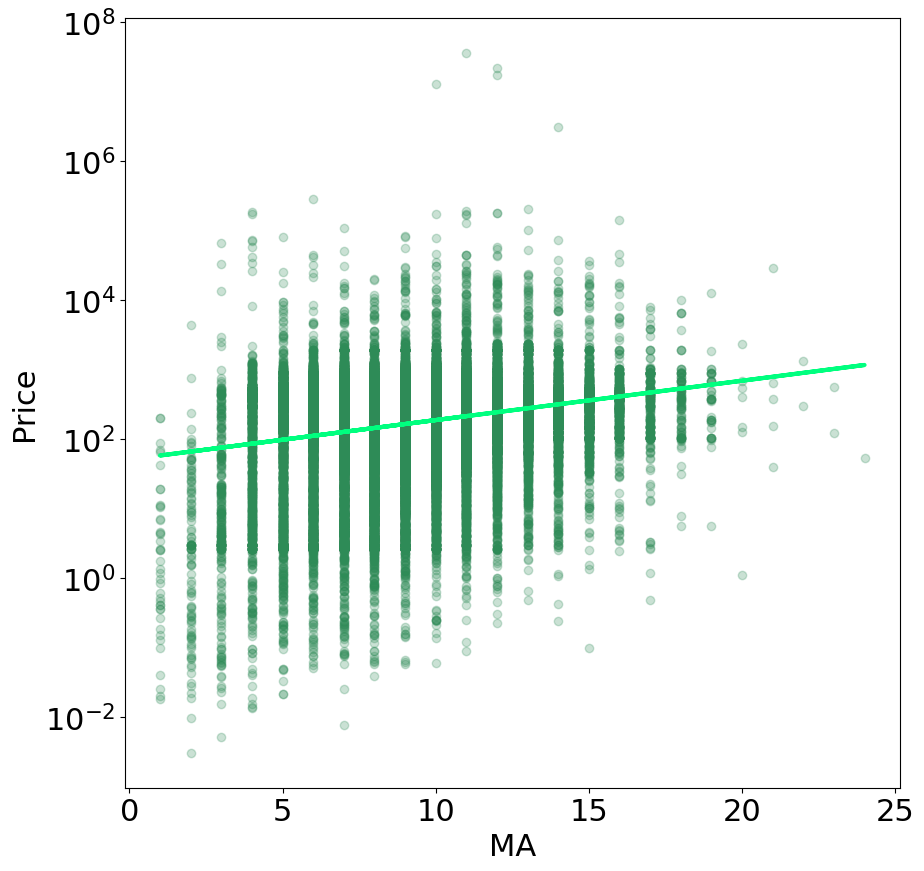

In [56]:
plt.figure(figsize=(10,10))

plt.yscale("log")

cost_df_filtered = cost_df_filtered.sort_values("price")

plt.scatter(cost_df_filtered["MA"], cost_df_filtered["price"], alpha=0.25, color="seagreen")
# sns.kdeplot(data=cost_df_filtered, x="MA", y="price", fill=True, color="seagreen", alpha=0.5)

#plt.plot(X, Y_pred, linewidth=3, color="springgreen")
slope, intercept = np.polyfit(cost_df_filtered["MA"], np.log(cost_df_filtered["price"]), 1)

plt.plot(cost_df_filtered["MA"], np.exp((slope*cost_df_filtered["MA"]) + intercept), color="springgreen", linewidth=3)

##Calculate Pearson correlation & Spearman (not assuming normality)
spearman_corr = stats.spearmanr(cost_df_filtered["MA"], cost_df_filtered["price"])

print(spearman_corr)

plt.xlabel("MA")
plt.ylabel("Price")

## Network figure

In [23]:
#Read in assembly data into a dictionary, {ID:MA_value}
MA_df = pd.read_csv("Data/AssemblyValues/assigneeCpds_AssemblyGo.csv")
assignee_cpd_MA_links = dict(zip(MA_df["label"], MA_df["MA_assemblyGo"]))

# TODO: add author cpds
MA_df = pd.read_csv("Data/AssemblyValues/authorcpds_AssemblyGo.csv")
author_cpd_MA_links = dict(zip(MA_df["label"], MA_df["MA_assemblyGo"]))

cpd_MA_links = {**assignee_cpd_MA_links, **author_cpd_MA_links}

MA_df = pd.DataFrame(cpd_MA_links.items(), columns=["label", "MA_assemblyGo"])

print(MA_df)

                   label  MA_assemblyGo
0        SCHEMBL10000057           10.0
1        SCHEMBL10000065            8.0
2        SCHEMBL10000069           12.0
3         SCHEMBL1000007           19.0
4        SCHEMBL10000081           16.0
...                  ...            ...
1331575   SCHEMBL9999904           15.0
1331576    SCHEMBL999991            7.0
1331577   SCHEMBL9999925           13.0
1331578   SCHEMBL9999926           14.0
1331579    SCHEMBL999994            7.0

[1331580 rows x 2 columns]


In [18]:
### ID/Degree relation: use 2015-2019 full ID list to find final degree value
full_id_degrees = pickle.load(file=open("/Volumes/Macintosh HD 4/SureChemBL/Degrees/full_id_degrees_2015_2019.p", "rb"))

print(list(full_id_degrees.items())[0:5])

[('SCHEMBL8038039', [418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418, 418]), ('SCHEMBL656810', [1877, 1877, 1877, 3744, 7513, 9389, 9389, 9389, 13151, 15023, 16895, 16895, 20644, 20644, 20644, 20644, 22525, 22525, 22525, 24406, 24406, 24406, 26278, 26278, 28153, 28153, 31932, 31932, 31932, 33832, 33832, 35734, 35734, 35734, 35734, 35734, 35734, 35734, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 37630, 39493, 39493, 43224, 43224, 43224, 43224, 43224]), ('SCHEMBL16387018', [103, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201

In [19]:
def get_degree(ID, full_id_degrees):
    if ID in full_id_degrees:
        return full_id_degrees[ID][-1]
    else:
        return -1

In [20]:
#Testing - shold be 43224 
get_degree("SCHEMBL656810", full_id_degrees)

43224

In [24]:
#Add degree values to MA dataframe
tqdm.pandas()

MA_df["degree"] = MA_df["label"].progress_apply(get_degree, args=(full_id_degrees,))

100%|██████████| 1331580/1331580 [00:17<00:00, 77802.62it/s] 


In [61]:
#Filter out all -1 MAs (indicates these MAs were not sampled)

MA_df_filtered = MA_df[MA_df["MA_assemblyGo"] > 0]

## Also where degrees are greater than 0

MA_df_filtered = MA_df_filtered[MA_df_filtered["degree"] > 0]


SpearmanrResult(correlation=-0.14137711117720303, pvalue=0.0)


Text(0, 0.5, 'Degree')

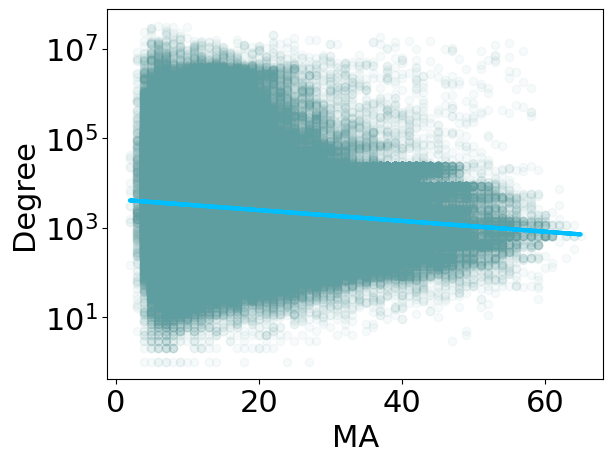

In [62]:
#Visual representation of 0 correlation (lol)
plt.Figure(figsize=(10,10))

plt.yscale("log")

plt.scatter(MA_df_filtered["MA_assemblyGo"], MA_df_filtered["degree"], color="cadetblue", alpha=0.05)
# sns.kdeplot(data=MA_df_filtered, x="MA_assemblyGo", y="degree", fill=True, color="cadetblue", alpha=0.5)

#plt.plot(X, Y_pred, linewidth=3, color="springgreen")
slope, intercept = np.polyfit(MA_df_filtered["MA_assemblyGo"], np.log(MA_df_filtered["degree"]), 1)

plt.plot(MA_df_filtered["MA_assemblyGo"], np.exp((slope*MA_df_filtered["MA_assemblyGo"]) + intercept), 
        color="deepskyblue", linewidth=3)

##Calculate Spearman correlation (not assuming normality)
spearman_corr = stats.spearmanr(MA_df_filtered["MA_assemblyGo"], MA_df_filtered["degree"])

print(spearman_corr)

plt.xlabel("MA")
plt.ylabel("Degree")

### Individual Researchers

In [65]:
results_df = pd.read_csv("Data/Patents/patent_MA_results_incomplete.csv")

100%|██████████| 71485/71485 [17:37<00:00, 67.59it/s]


Text(0, 0.5, 'Patents')

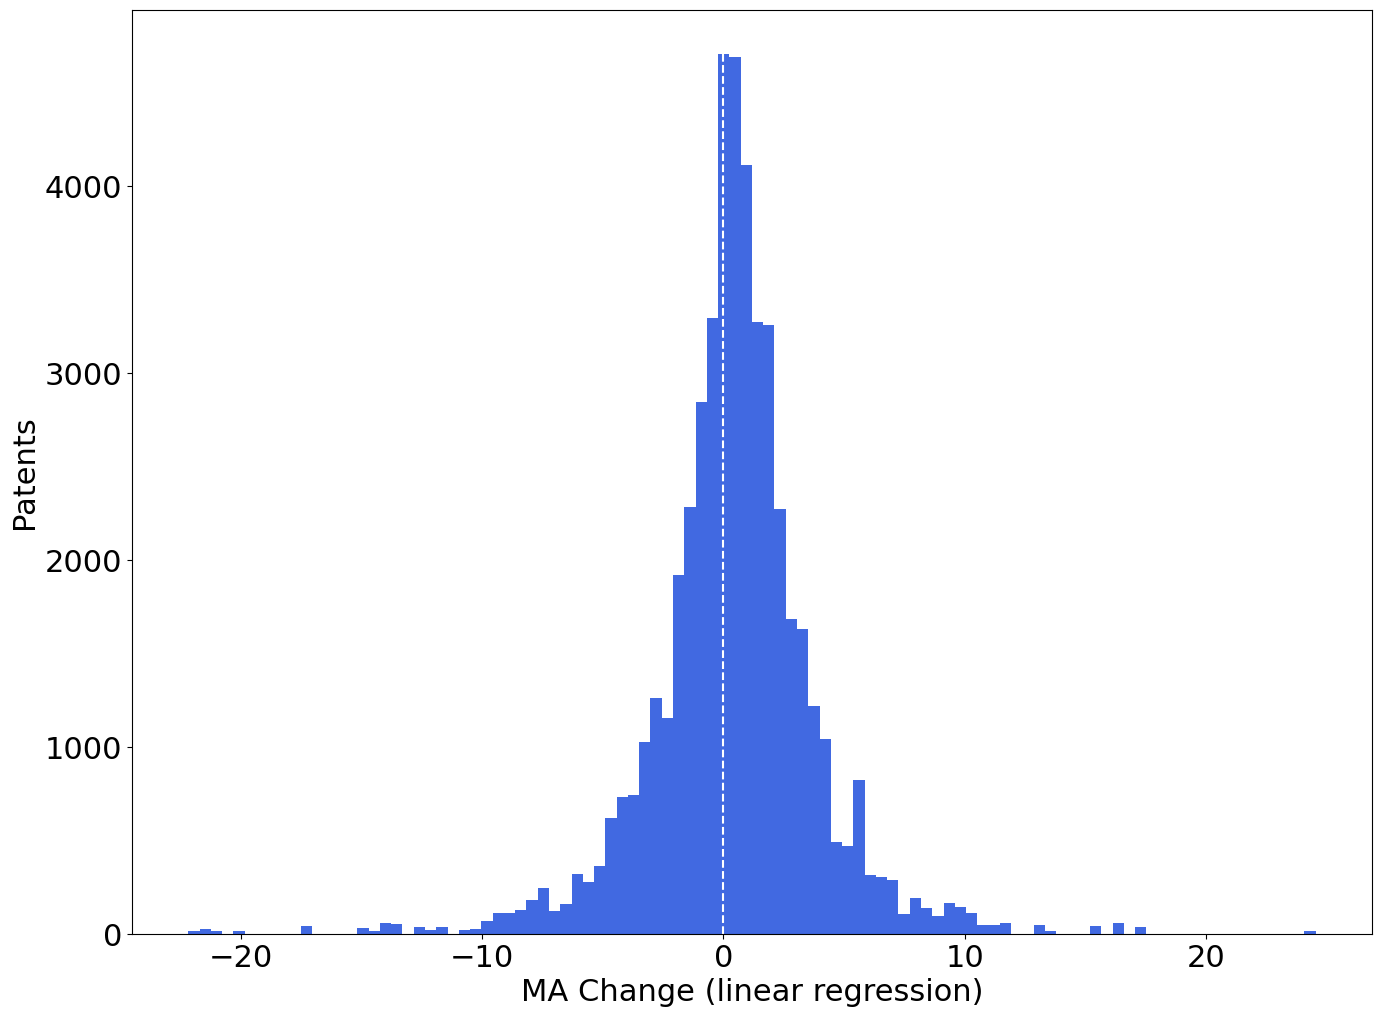

In [66]:
#Alternative graphing (finding slope change in MA)
linear_regressor = LinearRegression()

MA_slopes = []

for author in tqdm(list(results_df["author"].unique())):
    sub_df = results_df[results_df["author"] == author]
    if len(sub_df) > 10:

        X = sub_df["date_ordinal"].values.reshape(-1,1)
        Y = sub_df["MA_avg"].values.reshape(-1,1)
        try:
            reg = linear_regressor.fit(X, Y)
            Y_pred = linear_regressor.predict(X)

            #Calculate deltaMA (change in MA of linear regression, taking into consideration negative slopes)
            MA_slopes.extend([reg.coef_[0][0] * (max(X) - min(X))[0]] * len(sub_df))
                        
        except ValueError as e:
            pass

plt.figure(figsize=(16,12))


plt.hist(MA_slopes, bins=100, color="royalblue")
plt.axvline(x=0, ymin=0, ymax=70, color="white", linestyle="--")
plt.xlabel("MA Change (linear regression)")
plt.ylabel("Patents")
# plt.title("Average MA changes - Authors", color="skyblue")
